## Esercitazione 5  del    19 Marzo 2024 


## Esercizio 1 
Si consideri l'equazione quadratica $x^2 + 2px - q = 0 $ con $p=10^5$ e $q=10^{-i}$, i=0,..,10

- Si stabilisca se il problema relativo al calcolo della soluzione $x= -p+\sqrt{p^2+q}$ risulta essere ben
      condizionato per tutti i valori di q assegnati;

- Si calcoli la soluzione x dell'equazione mediante la formula risolutiva indicata al punto precedente e si dica se l'algoritmo di calcolo risulta numericamente
stabile  per i valori di q assegnati

- si individui una forma stabile per il calcolo della soluzione e si verifichi se l'algoritmo di calcolo risulta numericamente stabile per i valori di q assegnati.

In [1]:
#La funzione di cui calcolare il condizionamento è f(q)=-p+sqrt{p^2+q},
#al variare di q, con q che tende a zero.
#Si calcola l'indice di condizionamento K=|f'(q)*q/f(q)| 
#si verifica che quando q->0 K ->1. 
#Il problema è ben condizionato. (vedi pdf in allegato)
import numpy as np
p=10.0**5
q=10.0**(-np.arange(11))
import numpy as np
x= -p+np.sqrt(p**2+q)
#La formula risolutiva non è numericamente stabile, perchè  quando q risulta più piccolo dello spacing in p**2, si ha il fenomeno della perdita di cifre significative
print('spacing per p**2 ', np.spacing(p**2),'\n valori di q=',q)
print(x)
#L'instabilità numerica si verifica per valori di q più piccoli dello spacing per 10**5 che è 
# da dato  1.9073486328125e-06 

spacing per p**2  1.9073486328125e-06 
 valori di q= [1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09
 1.e-10]
[4.99999442e-06 5.00003807e-07 5.00003807e-08 4.99130692e-09
 4.94765118e-10 4.36557457e-11 1.45519152e-11 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [2]:
#la formula stabile, si ottiene moltiplicando
#la formula di partenza per 
# (+p+sqrt{p^2+q})/(+p+sqrt{p^2+q})
x2= q/(p+np.sqrt(p**2+q))
print(x2)

[5.e-06 5.e-07 5.e-08 5.e-09 5.e-10 5.e-11 5.e-12 5.e-13 5.e-14 5.e-15
 5.e-16]


## Esercizio 2

Realizzate un codice python che implementa il seguente algoritmo. Si tratta dell'implementazione del  metodo di Archimede per l'approssimazione di pi-greco e genera una successione di valori $p_i$, i=1,n, (n scelto dall'utente) che tende a $\pi$. Verificare se all'aumentare di n, la successione $p_i$ tende a $\pi$.

b[0]=2

s[0]=1

for i in range(1,n):

    p[i]=b[i-1]*s[i-1]
    b[i]=2*b[i-1]
     s[i]=math.sqrt((1.0-math.sqrt(1-s[i-1]**2))/2.0)

- Visualizzate su un grafico gli elementi della successione p[i] calcolata.
- Calcolate e visualizzate su un grafico l'errore relativo per ogni componente di p[i], - considerando come valore esatto di pigreco il valore math.pi.

- Giustificate i risultati alla luce della teoria.

- Proponete una versione stabile dell'algoritmo

- Calcolate e visualizzate su un grafico l'errore relativo per ogni componente di p[i] prodotta dall'algoritmo stabilizzato, considerando come valore esatto di
pigreco il valore math.pi.

spacing in [1,2] 2.220446049250313e-16
1 1.0
2 0.5000000000000001
3 0.1464466094067263
4 0.03806023374435664
5 0.009607359798384785
6 0.0024076366639015356
7 0.0006022718974137975
8 0.00015059065189787502
9 3.7649080427748505e-05
10 9.412358699445457e-06
11 2.35309521190441e-06
12 5.882741490603749e-07
13 1.4706855888668715e-07
14 3.676714105393941e-08
15 9.191785388384942e-09
16 2.2979463332184476e-09
17 5.744865694268242e-10
18 1.4362167011228166e-10
19 3.590544528364603e-11
20 8.976375198699316e-12
21 2.244093799674829e-12
22 5.610512054943229e-13
23 1.4027667916138855e-13
24 3.5083047578154947e-14
25 8.770761894538737e-15
26 2.2204460492503135e-15
27 5.551115123125784e-16
28 1.6653345369377346e-16
29 5.551115123125783e-17
30 0.0
31 0.0
32 0.0
33 0.0


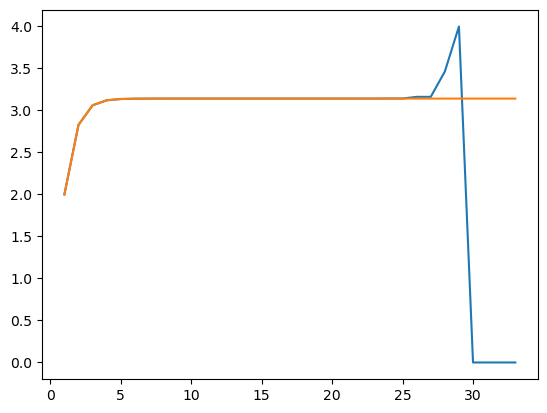

In [3]:
n=34
import math
import matplotlib.pyplot as plt
import numpy as np
b=np.zeros((n,))
s=np.zeros((n,))
p=np.zeros((n,))
b[0]=2
s[0]=1
print("spacing in [1,2]",np.spacing(1))
for i in range(1,n):
     p[i]=b[i-1]*s[i-1]
     b[i]=2*b[i-1]
     print(i,s[i-1]**2)
     s[i]=math.sqrt((1.0-math.sqrt(1-s[i-1]**2))/2.0)

#Si verifica che s[i-1]**2 dall'iterato 28 in avanti  assume un valore più piccolo
#dello spacing in [1,2], circa 2.e-16. Questo comporta dall'iterato 30 in avanti
#l' annullamento di s[i]  ed il conseguente annullamento di p[i]
        
bs=np.zeros((n,))
ss=np.zeros((n,))
ps=np.zeros((n,))
bs[0]=2
ss[0]=1
for i in range(1,n):
     ps[i]=bs[i-1]*ss[i-1]
     bs[i]=2*bs[i-1]
     ss[i]=ss[i-1]/math.sqrt((2.0*(1.0+math.sqrt(1.0-ss[i-1]**2))))

plt.plot(np.arange(1,n),p[1:n],np.arange(1,n),ps[1:n])

## Esercizio 3   
Si consideri lo sviluppo in serie dell'esponenziale $e^x=1+x+\frac{1}{2!}x^2+\frac{1}{3!}x^3+\cdots =\sum_{k=0}^\infty \frac{x^k}{k!} $. Si calcoli un'approssimazione dell'esponenziale troncando ad N=100 termini la serie, per valori di x che variano da -10 a 10 incluso. Si calcoli  per ogni valore di x l'errore relativo del valore approssimato rispetto al valore esatto, ottenuto mediante la funzione exp della libreria numpy. Cosa si osserva? Pensare ad un algoritmo più stabile ricordando che $e^{-x}=\frac{1}{e^{|x|}}$.



In [4]:
def esp_taylor(x,N):
   
    r=x
    fattoriale=1
    esponential=1+r;
    for i in range(2,N+1):
        r=r*x
        fattoriale=fattoriale*i;
        esponential=esponential+r/fattoriale;
    return esponential
 
def esp_taylor_stabile(x,N):
    
    if x<0:
        x=abs(x)
        r=x
        fattoriale=1
        esponential=1+r;
        for i in range(2,N+1):
            r=r*x
            fattoriale=fattoriale*i;
            esponential=esponential+r/fattoriale;
    
        return 1/esponential
    
    else: 

        r=x
        fattoriale=1
        esponential=1+r;
        for i in range(2,N+1):
            r=r*x
            fattoriale=fattoriale*i;
            esponential=esponential+r/fattoriale;
        return esponential

[7.23266687e-09 5.77518674e-10 1.47727610e-10 1.26080974e-11
 7.25031545e-13 2.13688307e-13 1.43963293e-14 9.75599868e-16
 6.15262516e-16 1.50894954e-16 0.00000000e+00 1.63371290e-16
 2.40403756e-16 3.53758398e-16 5.20561767e-16 1.91503972e-16
 0.00000000e+00 6.22013862e-16 1.52550741e-16 0.00000000e+00
 3.30327965e-16]


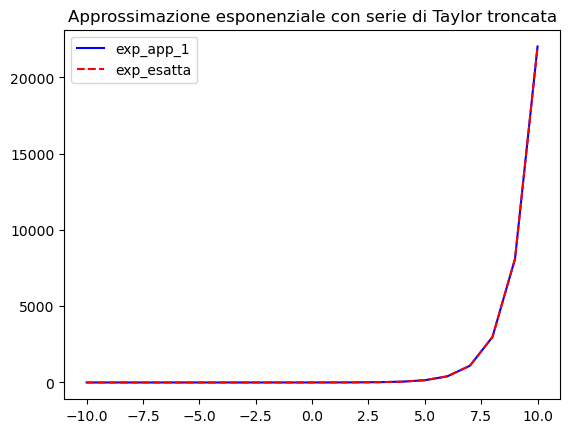

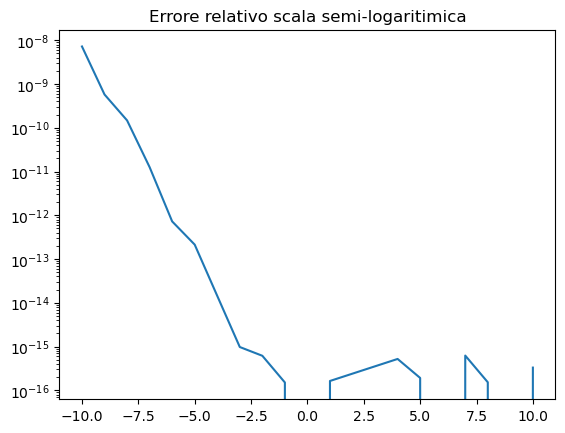

[1.49257138e-16 2.19634530e-16 3.23196113e-16 7.13383232e-16
 0.00000000e+00 2.57455791e-16 3.78850770e-16 4.18114229e-16
 4.10175011e-16 3.01789907e-16 0.00000000e+00 1.63371290e-16
 2.40403756e-16 3.53758398e-16 5.20561767e-16 1.91503972e-16
 0.00000000e+00 6.22013862e-16 1.52550741e-16 0.00000000e+00
 3.30327965e-16]


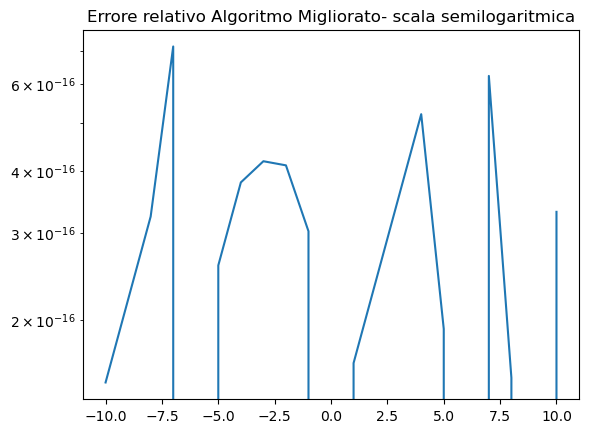

In [5]:
import numpy as np
import matplotlib.pyplot as plt
 

a=-10.0             
b=10.0                
ncampio=21
N=100

xc= np.linspace(a,b,ncampio)
exp_es=np.exp(xc); #esponenziale esatto


exp_app=np.zeros((ncampio,)); 
nt=np.zeros((ncampio,));     #indice n della serie

for i in range(ncampio):
    exp_app[i]= esp_taylor(xc[i],N);


err_rel=np.abs(exp_app-exp_es)/np.abs(exp_es)

print(err_rel)
plt.plot(xc,exp_app,'b-',xc,exp_es,'r--')
plt.title('Approssimazione esponenziale con serie di Taylor troncata')
plt.legend(['exp_app_1','exp_esatta'])
plt.show()


plt.plot(xc,err_rel)
plt.yscale("log")
plt.title("Errore relativo scala semi-logaritimica")
plt.show()

#Si nota che l'errore relativo risulta più alto nel caso di esponente negativo, perchè lo sviluppo in serie
#presenta termini a segno alterno, e sappiamo che in situazioni particolari la somma tra numeri a segno alterno
#può provocare la cancellazione di cifre significative e produrre quindi un algoritmo instabile
'''
--------------------------------------------------------------------------
come migliorare andamento errore relativo
--------------------------------------------------------------------------
'''
#Pe realizzare un aglrotimo stabile si considera il fatto che exp(-x)= 1/exp(x).
#Si calcola quindi lo sviluppo in serie troncato ad n termini di exp(abs(x)) e poi se ne considera il reciproco.

for i in range(ncampio) :
       exp_app[i]= esp_taylor_stabile(xc[i],N)
   

err_rel_2=np.abs(exp_app-exp_es)/np.abs(exp_es)
print(err_rel_2)
plt.plot(xc,err_rel_2)
plt.yscale("log")
plt.title('Errore relativo Algoritmo Migliorato- scala semilogaritmica')
plt.show()

## Esercizio 4
Calcolare l'approssimazione della derivata prima di f(x) = sin(x) in x = 1
mediante l'algoritmo del rapporto incrementale (f(x + h) - f(x))/h per valori decrescenti
di h, confrontandolo con il valore fornito dalla funzione di libreria per f'(x)
mediante calcolo dell'errore relativo.

Spacing in [1,2]  2.220446049250313e-16
incremento h [1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09
 1.e-10 1.e-11 1.e-12 1.e-13 1.e-14 1.e-15 1.e-16 1.e-17 1.e-18 1.e-19
 1.e-20]
Rapporto incrementale [0.06782644 0.49736375 0.53608598 0.53988148 0.54026023 0.5402981
 0.54030189 0.54030226 0.5403023  0.54030236 0.54030225 0.54030114
 0.54034555 0.53956839 0.54400928 0.55511151 0.         0.
 0.         0.         0.        ]


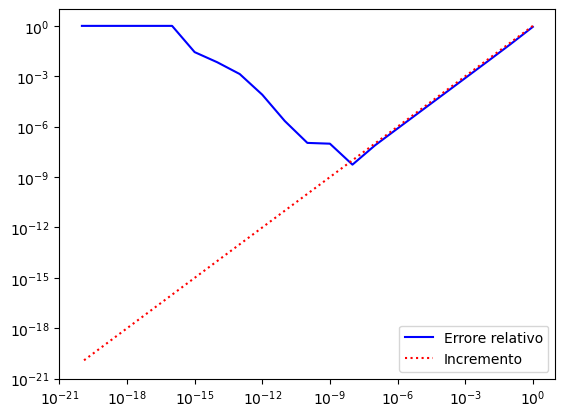

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
k=np.arange(0,-21.0,-1)
h=10.0**k

des=math.cos(1);            #derivata esatta


x=1
rai=(np.sin(x+h)-np.sin(x))/h #rapporto incrementale
print("Spacing in [1,2] ",np.spacing(1))
print("incremento h",h)
print("Rapporto incrementale",rai)

err_rel=np.abs(rai-des)/np.abs(des); # errore relativo


plt.plot(h,err_rel,'b-',h,h,'r:')
plt.xscale("log")
plt.yscale("log")
plt.legend(['Errore relativo', 'Incremento'])

#Si osserva che quando il valore dell'incremento h, risulta più piccolo dello spacing 
#in [1,2], cioè a partire da h=1e-16, il numeratore si annulla a causa della
#cancellazione di cifre significative, e quindi il rapporto incrementale si 
#annulla.

## Esercizio 5
Valutazione di un polinomio in un vettore di punti
-   Realizzare una function  che mediante lo schema di Horner  valuti un polinomio in un vettore di punti.
-   Realizzare una function  che utilizzi l’algoritmo classico per valutare un polinomio in un vettore di punti.
-   Valutare   i seguenti polinomi, con i due metodi implementati nei punti precedenti,  sul vettore di punti specificato  e  rappresentarli graficamente. Confrontarne i tempi 

         p(x)=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256  da valutare su vettore di  1000000 punti equidistanti in [1.8,2.2]
         p(x)= x^11 –8 x^9 +28 x^6 –7 x^4 +12 x^3 –4 x +1   da valutare su vettore di 1000000  punti in [-5:5]
         
Cosa conferma questo esperimento?


In [7]:
import numpy as np
def valuta_horner(a,x):
    n=a.shape[0]

    p=a[n-1]*np.ones_like(x)
    for i in range(2,n+1):
         p=p*x+a[n-i] 
    return p



In [8]:
def valuta_alg1(a,x):
    n=a.shape[0]
    p=a[0]*np.ones_like(x)
    r=1
    for i in range(1,n):
        r=r*x
        p=p+a[i]*r
    return p



Tempo algoritmo 1  0.03433837800184847
Tempo algoritmo horner  0.018922545001260005


"\nSi conferma sperimentalmente che lo schema di Horner per\nvalutare un polinomio in un punto impiega un tempo che è circa la metà di\nquello impiegato dall'algoritmo 1.\n"

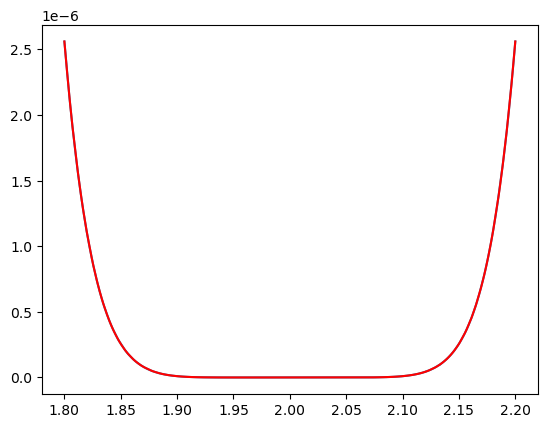

In [9]:
import matplotlib.pyplot as plt
import time
n=1000000 
x=np.linspace(1.8,2.2,n)
a=np.array([256, -1024, 1792, -1792, 1120, -448, 112, -16 ,1],dtype=float);
start_time=time.perf_counter()
pol1=valuta_alg1(a,x)
stop_time=time.perf_counter()
print("Tempo algoritmo 1 ",stop_time-start_time)
start_time=time.perf_counter()
polh=valuta_horner(a,x)
stop_time=time.perf_counter()
print("Tempo algoritmo horner ",stop_time-start_time)
plt.plot(x,pol1,x,polh,'r')
'''
Si conferma sperimentalmente che lo schema di Horner per
valutare un polinomio in un punto impiega un tempo che è circa la metà di
quello impiegato dall'algoritmo 1.
'''

## Esercizio 6
Realizzare un codice python che calcola il valore del polinomio p(x)=(x-2)^8 utilizzando le formule

    p=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256;
    p(x)=(x-2)^8
    e lo schema di Horner

e ne realizza il grafico in un vettore di 10000 equidistanti nell’intervallo [1.8,2.2], [1.9, 2.1],  [1.92,2.08], [1.93,2.07], [1.94,2.06] Spiegare il comportamento osservato. Cosa succede al restringersi dell’intervallo intorno al valore 2, punto in cui questo polinomio si annulla?




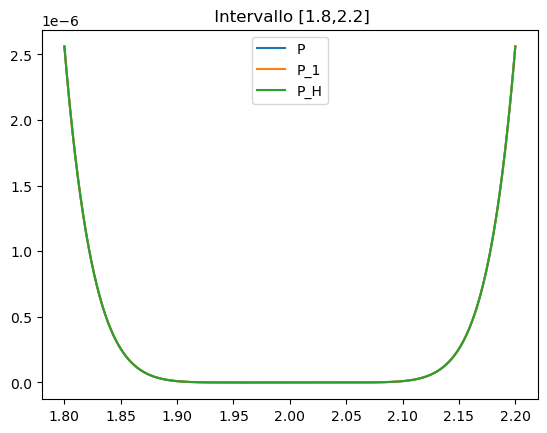

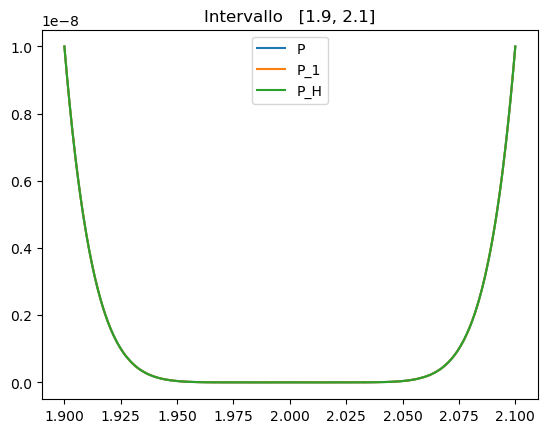

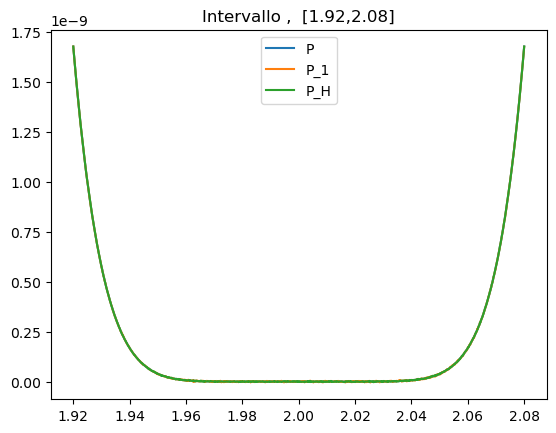

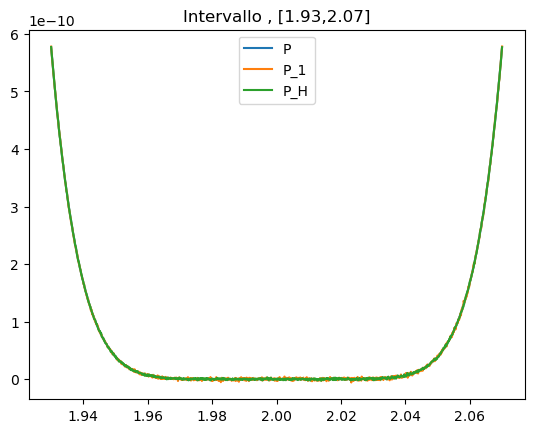

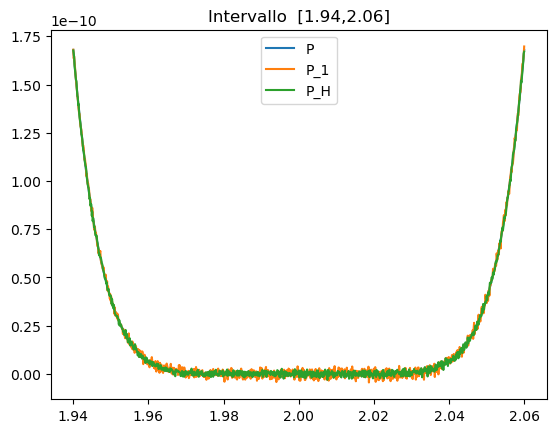

In [10]:
n=1000
f= lambda x: (x-2.0)**8.0 
x1=np.linspace(1.8,2.2,n)
P_x1=f(x1)
P_1_x1=valuta_alg1(a,x1)
P_H_x1=valuta_horner(a,x1)

x2=np.linspace(1.9,2.1,n)
P_x2=f(x2)
P_1_x2=valuta_alg1(a,x2)
P_H_x2=valuta_horner(a,x2)

x3=np.linspace(1.92,2.08,n)
P_x3=f(x3)
P_1_x3=valuta_alg1(a,x3)
P_H_x3=valuta_horner(a,x3)

x4=np.linspace(1.93,2.07,n)
P_x4=f(x4)
P_1_x4=valuta_alg1(a,x4)
P_H_x4=valuta_horner(a,x4)

x5=np.linspace(1.94,2.06,n)
P_x5=f(x5)
P_1_x5=valuta_alg1(a,x5)
P_H_x5=valuta_horner(a,x5)

#plt.subplot(3,2,1)
plt.plot(x1,P_x1,x1,P_1_x1,x1,P_H_x1)
plt.legend(['P','P_1','P_H'])
plt.title(' Intervallo [1.8,2.2]')
plt.show()
#plt.subplot(3,2,2)
plt.plot(x2,P_x2,x2,P_1_x2,x2,P_H_x2)
plt.legend(['P','P_1','P_H'])
plt.title('Intervallo   [1.9, 2.1]') 
plt.show()
#plt.subplot(3,2,3)
plt.plot(x3,P_x3,x3,P_1_x3,x3,P_H_x3)
plt.legend(['P','P_1','P_H'])
plt.title('Intervallo ,  [1.92,2.08]')
plt.show()
#plt.subplot(3,2,4)
plt.plot(x4,P_x4,x4,P_1_x4,x4,P_H_x4)
plt.legend(['P','P_1','P_H'])
plt.title('Intervallo , [1.93,2.07]')
plt.show()
#plt.subplot(3,2,5)
plt.plot(x5,P_x5,x5,P_1_x5,x5,P_H_x5)
plt.legend(['P','P_1','P_H'])
plt.title('Intervallo  [1.94,2.06]')
plt.show()

Si nota che al restringersi dell'intervallo in torno al punto x=2, 
in cui la funzione si annulla, si evidenzia l'instabilità dell'algoritmo 1
rispetto all' algoritmo di Horner che risulta più stabile. 
